# All Team models compared

In [1]:
# Import
from torch import nn
from torch.utils.data import DataLoader

from models.models import *
from datasets.datasets import *
from utils import *

In [2]:
# Meta
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device: {device}")

Device: cuda


# Dataset

In [3]:
NL=[1,2,3,4,5]
N=[5]
file = './Data/team/processed/team_data.xlsx'
dataset = get_team_dataset(file, NL=NL)

Targets
['W%', 'L%', 'S']
Normalizing features
[]
All features
['W%', 'L%', 'GF/G', 'GA/G', 'PIM/G', 'oPIM/G', 'S', 'S%', 'SV%']
Loading player data
creating dataset structure


# Dataloader

In [4]:
batch_size = 10
N_datasets = dataset.random_split(0.2)

### Varying N Dataloader

In [5]:
dataloaders_train = {}
dataloaders_test ={}
for Nd in N_datasets:
    #dataset_train = TeamDataset(Nd[1],N=Nd[0])
    #dataset_test = TeamDataset(Nd[2],N=Nd[0])

    # Set max_N to 0 to remove padding
    dataset_train = TeamDataset(Nd[1],max_N=0)
    dataset_test = TeamDataset(Nd[2],max_N=0)

    # Must generate batches of sequence data with the following format:
    # (batch_size, num_seasons(N), input_size(num stats))
    # (https://stackoverflow.com/questions/49466894/how-to-correctly-give-inputs-to-embedding-lstm-and-linear-layers-in-pytorch/49473068#49473068)
    dataloader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
    dataloader_test = DataLoader(dataset_test, batch_size=batch_size, shuffle=True)

    dataloaders_train[Nd[0]] = dataloader_train
    dataloaders_test[Nd[0]] = dataloader_test

### Fixed N Dataloaders

In [6]:
N_datasets_train = []
N_datasets_test = []
N_dataloaders_train = []   
N_dataloaders_test = []
all_datasets_train = []
all_datasets_test = []

# Create dataset for each N
for (N, train_dataset, test_dataset) in N_datasets:

    # Get dataset with only one N 
    new_dataset = get_team_dataset(file, NL=[N])
    (N, train_dataset, test_dataset) = new_dataset.random_split(0.2)[0]
    
    # Create datasets
    N_datasets_train.append(TeamDataset(train_dataset, max_N=N))
    N_datasets_test.append(TeamDataset(test_dataset, max_N=N))
    

    # Add to "all datasets" dataset
    all_datasets_train += train_dataset
    all_datasets_test +=test_dataset

    print(f"Train size for {N} seasons: {len(N_datasets_train[-1])}")
    print(f"Test size for {N} seasons: {len(N_datasets_test[-1])}")


    # Create dataloaders
    N_dataloaders_train.append(DataLoader(N_datasets_train[-1], batch_size=batch_size, shuffle=True))
    N_dataloaders_test.append(DataLoader(N_datasets_test[-1], batch_size=batch_size, shuffle=True))


# Create dataset for "all datasets"
all_datasets_train = TeamDataset(all_datasets_train, max_N=max(NL))
all_datasets_test = TeamDataset(all_datasets_test, max_N=max(NL))
print(f"Train size for all seasons: {len(all_datasets_train)}")
print(f"Test size for all seasons: {len(all_datasets_test)}")
all_dataloader_train = DataLoader(all_datasets_train, batch_size=batch_size, shuffle=True)
all_dataloader_test = DataLoader(all_datasets_test, batch_size=batch_size, shuffle=True)

print(N_datasets_train[0].__getitem__(0))

Targets
['W%', 'L%', 'S']
Normalizing features
[]
All features
['W%', 'L%', 'GF/G', 'GA/G', 'PIM/G', 'oPIM/G', 'S', 'S%', 'SV%']
Loading player data
creating dataset structure
Train size for 1 seasons: 709
Test size for 1 seasons: 195
Targets
['W%', 'L%', 'S']
Normalizing features
[]
All features
['W%', 'L%', 'GF/G', 'GA/G', 'PIM/G', 'oPIM/G', 'S', 'S%', 'SV%']
Loading player data
creating dataset structure
Train size for 2 seasons: 642
Test size for 2 seasons: 194
Targets
['W%', 'L%', 'S']
Normalizing features
[]
All features
['W%', 'L%', 'GF/G', 'GA/G', 'PIM/G', 'oPIM/G', 'S', 'S%', 'SV%']
Loading player data
creating dataset structure
Train size for 3 seasons: 582
Test size for 3 seasons: 186
Targets
['W%', 'L%', 'S']
Normalizing features
[]
All features
['W%', 'L%', 'GF/G', 'GA/G', 'PIM/G', 'oPIM/G', 'S', 'S%', 'SV%']
Loading player data
creating dataset structure
Train size for 4 seasons: 527
Test size for 4 seasons: 174
Targets
['W%', 'L%', 'S']
Normalizing features
[]
All featur

# Training and Validation


There are 

-Average (one per N) (1)
-Linear (one per N) (5)
-LSTM Fixed N (one per N) (5)
-LSTM Varying N (one per N) (1)

## Standalone LSTM Model

In [7]:
input_size = len(dataset_train.__getitem__(0)[0][0])
output_size = len(dataset_train.__getitem__(0)[1])
hidden_size = 10
num_layers = 1

criterion = RMSELoss()

lr = 0.001
opt = torch.optim.Adam

epochs = 50
loss_interval = 5

### Fixed N Models

Training model for 1 seasons
0 th epoch :  0.9774003146399914
Validation loss for epoch 0: 0.9296575397253036
Validation loss for epoch 5: 0.9016043603420257
10 th epoch :  0.8395050646553577
Validation loss for epoch 10: 0.8715150743722916
Validation loss for epoch 15: 0.8870433270931244
20 th epoch :  0.8268885188539263
Validation loss for epoch 20: 0.8632267355918884
Validation loss for epoch 25: 0.8633008867502212
30 th epoch :  0.8063362828442748
Validation loss for epoch 30: 0.8578777074813843
Validation loss for epoch 35: 0.8589887589216232
40 th epoch :  0.7966772162578475
Validation loss for epoch 40: 0.8504402756690979
Validation loss for epoch 45: 0.8455531269311904


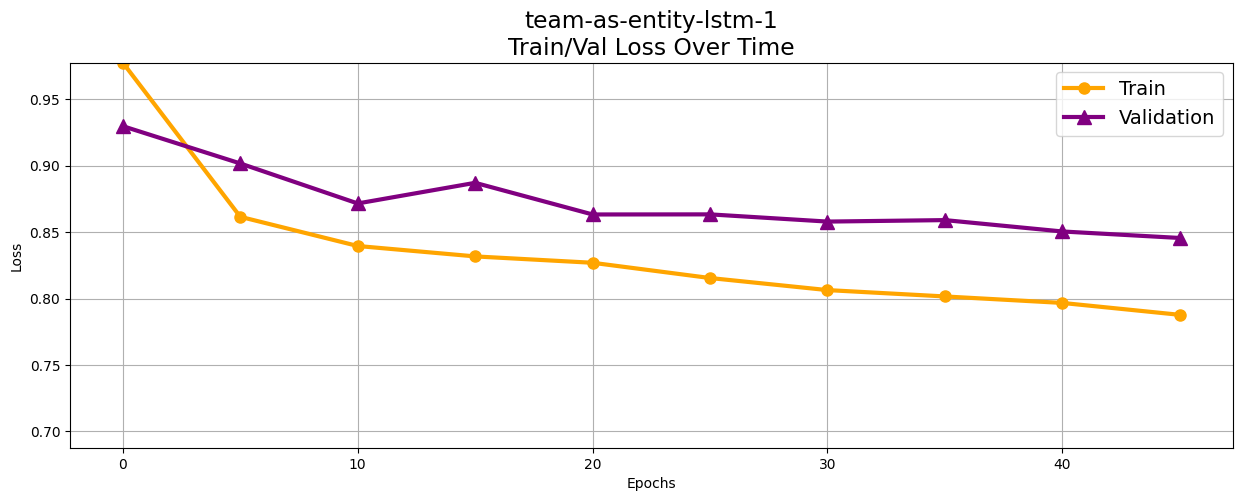

Training model for 2 seasons
0 th epoch :  0.9677624509884761
Validation loss for epoch 0: 0.8994777709245682
Validation loss for epoch 5: 0.818661741912365
10 th epoch :  0.8341591757077437
Validation loss for epoch 10: 0.818266648054123
Validation loss for epoch 15: 0.8036655008792877
20 th epoch :  0.8134979697374197
Validation loss for epoch 20: 0.7823975354433059
Validation loss for epoch 25: 0.7709126845002174
30 th epoch :  0.7790488233933082
Validation loss for epoch 30: 0.7748850837349892
Validation loss for epoch 35: 0.767475837469101
40 th epoch :  0.7508649793954996
Validation loss for epoch 40: 0.7680078774690628
Validation loss for epoch 45: 0.7701892167329788


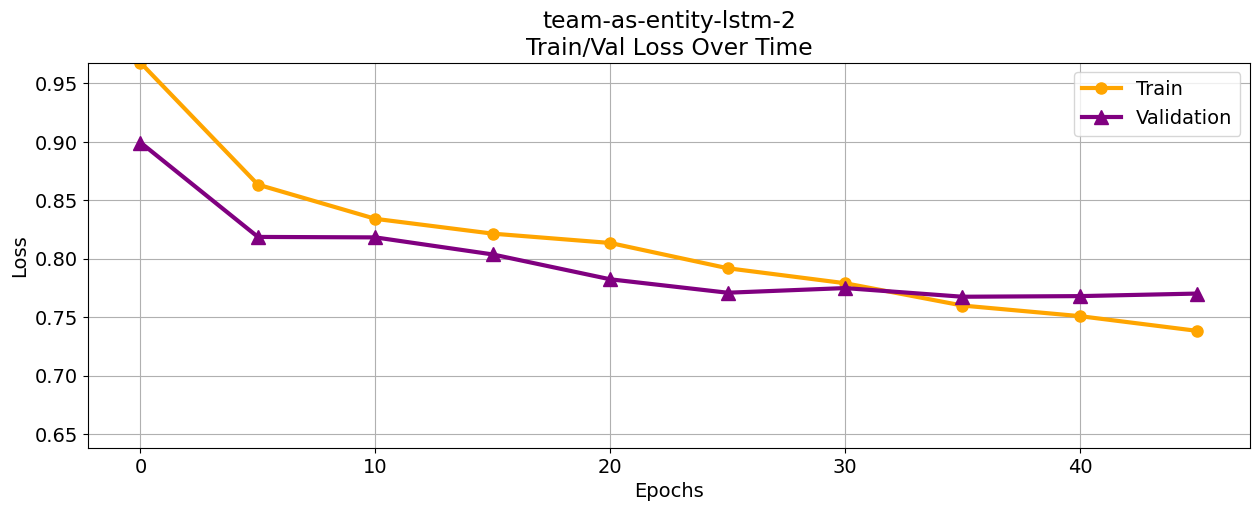

Training model for 3 seasons
0 th epoch :  0.985801305811284
Validation loss for epoch 0: 0.9638652707401075
Validation loss for epoch 5: 0.883321109570955
10 th epoch :  0.8472019545102524
Validation loss for epoch 10: 0.8598365407241019
Validation loss for epoch 15: 0.8673938606914721
20 th epoch :  0.8163774215568931
Validation loss for epoch 20: 0.8675936554607592
Validation loss for epoch 25: 0.8597897761746457
30 th epoch :  0.7920815328420219
Validation loss for epoch 30: 0.855966252715964
Validation loss for epoch 35: 0.8712570228074726
40 th epoch :  0.7629993350829108
Validation loss for epoch 40: 0.87736576795578
Validation loss for epoch 45: 0.8877845437903154


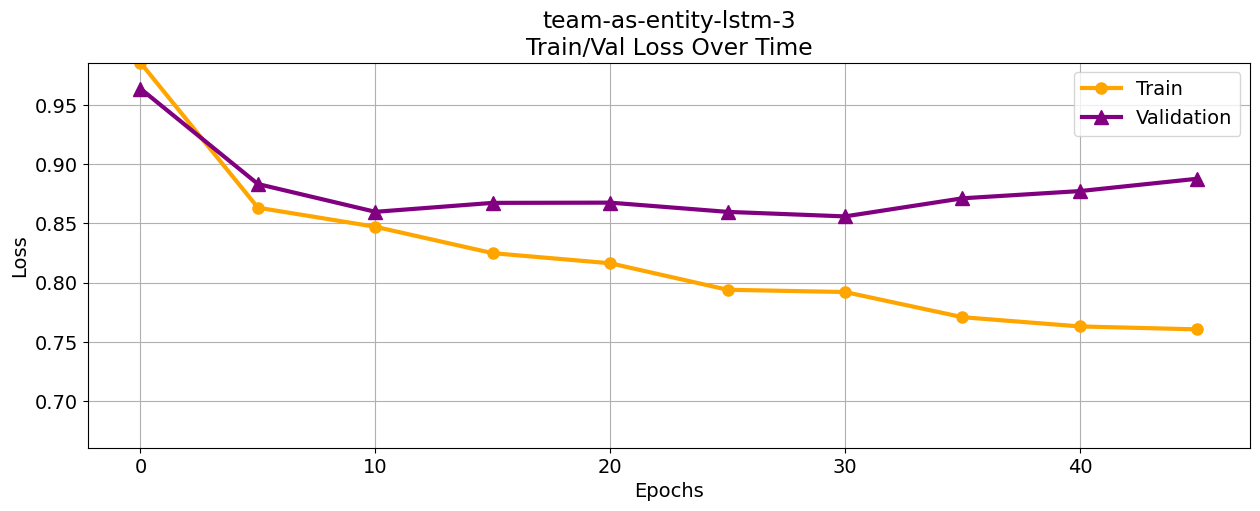

Training model for 4 seasons
0 th epoch :  0.9847106708670562
Validation loss for epoch 0: 1.0304659439457788
Validation loss for epoch 5: 0.879906415939331
10 th epoch :  0.8329424368885329
Validation loss for epoch 10: 0.8929567270808749
Validation loss for epoch 15: 0.9006087283293406
20 th epoch :  0.7971456523211498
Validation loss for epoch 20: 0.8733330302768283
Validation loss for epoch 25: 0.8913112978140513
30 th epoch :  0.767572468744134
Validation loss for epoch 30: 0.875429736243354
Validation loss for epoch 35: 0.8815669251812829
40 th epoch :  0.7349433449079406
Validation loss for epoch 40: 0.8901801705360413
Validation loss for epoch 45: 0.9051068557633294


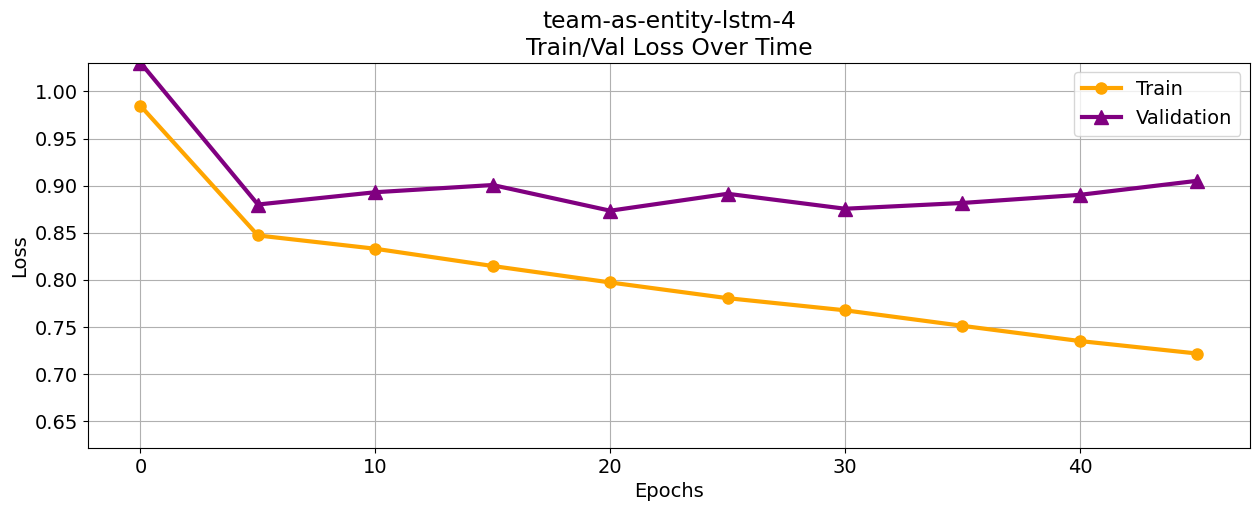

Training model for 5 seasons
0 th epoch :  0.9982958987907127
Validation loss for epoch 0: 0.9329740838571028
Validation loss for epoch 5: 0.8676660006696527
10 th epoch :  0.8267436656686995
Validation loss for epoch 10: 0.9200138503854925
Validation loss for epoch 15: 0.8445501923561096
20 th epoch :  0.7670725368791156
Validation loss for epoch 20: 0.8553134311329235
Validation loss for epoch 25: 0.8768538290804083
30 th epoch :  0.7327576014730666
Validation loss for epoch 30: 0.9459611285816539
Validation loss for epoch 35: 0.8708331205628135
40 th epoch :  0.7030905650721656
Validation loss for epoch 40: 0.8665988120165738
Validation loss for epoch 45: 0.8971789533441717


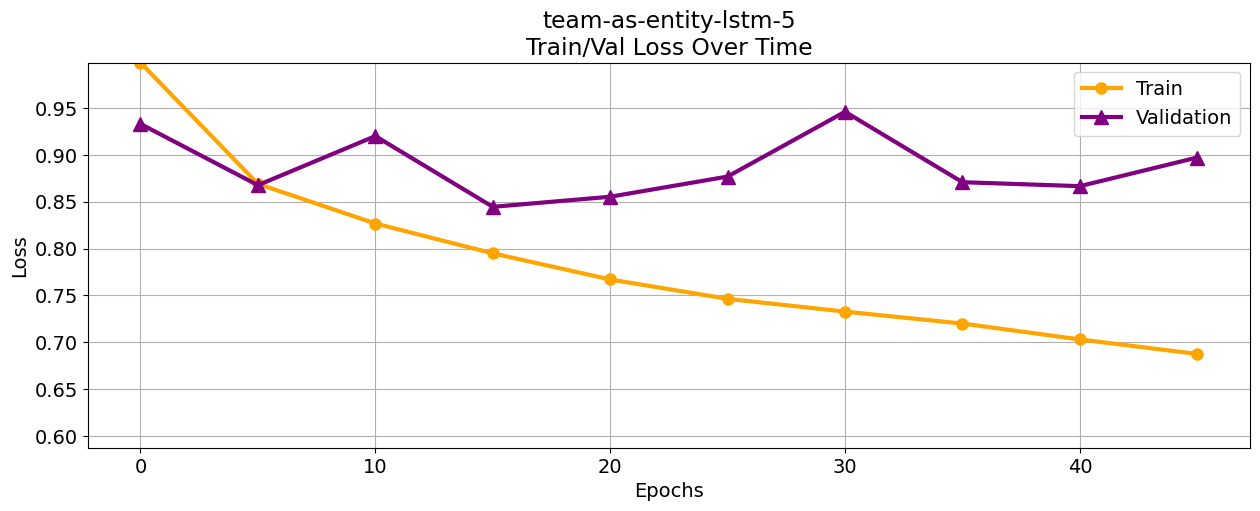

In [8]:
# Standalone Model Fixed N
model_N_losses = []
model_N = []
for i in range(len(NL)):
    print(f"Training model for {NL[i]} seasons")
    model_N.append(TeamStandalone(input_size=input_size, output_size=output_size, hidden_size=hidden_size, device=device).to(device))
    optimizer = opt(model_N[i].parameters(), lr=lr)
    
    (model_N[i], train_losses, val_losses) = train_and_validate(model_N[i], criterion, optimizer, N_dataloaders_train[i], N_dataloaders_test[i], epochs=epochs, loss_interval=loss_interval, device=device)
    model_N_losses.append((train_losses, val_losses))

    plot_train_v_loss(f"team-as-entity-lstm-{NL[i]}", train_losses, val_losses, loss_interval)
    
    


### Varying N model (with padding) - UNUSED

Training model for all seasons


0 th epoch :  0.911629148920377
Validation loss for epoch 0: 0.8653985472286448
Validation loss for epoch 5: 0.8234703814282137
10 th epoch :  0.7917949000994364
Validation loss for epoch 10: 0.7888906492906458
Validation loss for epoch 15: 0.776367769872441
20 th epoch :  0.7335508786638578
Validation loss for epoch 20: 0.7628190219402313
Validation loss for epoch 25: 0.7511767299736247
30 th epoch :  0.7038327316443126
Validation loss for epoch 30: 0.7470554544645197
Validation loss for epoch 35: 0.7407572350081275
40 th epoch :  0.6880205025275549
Validation loss for epoch 40: 0.7318260852028342
Validation loss for epoch 45: 0.7336748179267435


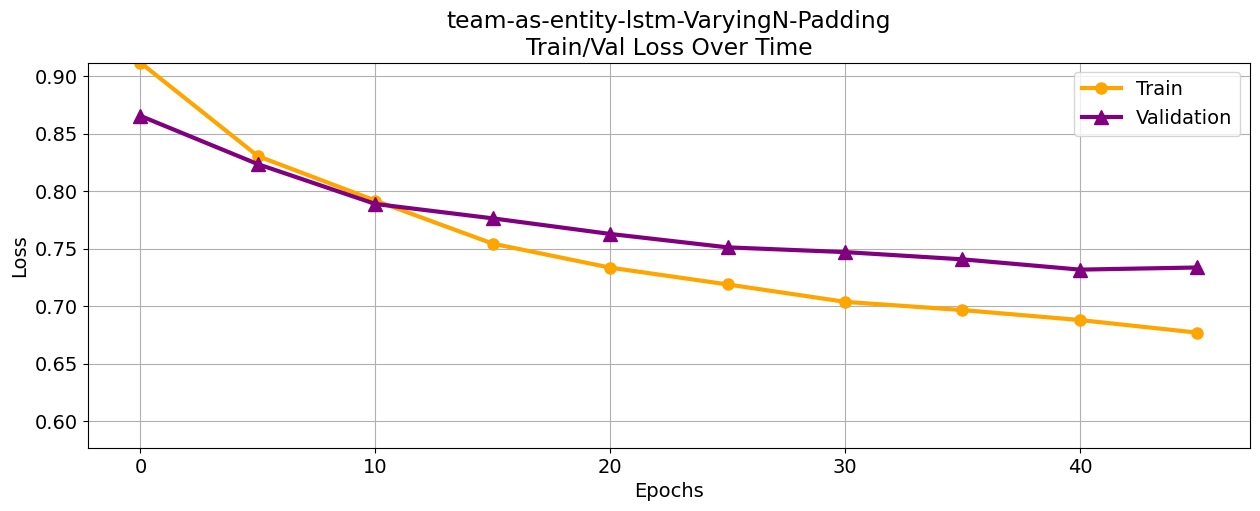

In [9]:
# Train on all data
print("Training model for all seasons")
input_size = len(all_datasets_train.__getitem__(0)[0][0])
model_all = TeamStandalone(input_size=input_size, output_size=output_size, hidden_size=hidden_size, num_layers=num_layers, device=device).to(device)
optimizer = opt(model_all.parameters(), lr=lr)
(model_all, train_losses, val_losses) = train_and_validate(model_all, criterion, optimizer, all_dataloader_train, all_dataloader_test, epochs=epochs, loss_interval=loss_interval, device=device)

model_all_losses = (train_losses, val_losses)

plot_train_v_loss(f"team-as-entity-lstm-VaryingN-Padding", train_losses, val_losses, loss_interval)

### Varying N model (no padding)

0 th epoch :  0.7185340657830238
Validation loss for epoch 0: 0.678915323416392
Validation loss for epoch 5: 0.6805147580305735
10 th epoch :  0.6942425688107808
Validation loss for epoch 10: 0.6799184413750966
Validation loss for epoch 15: 0.682398666938146
20 th epoch :  0.6930906385183334
Validation loss for epoch 20: 0.684204029639562
Validation loss for epoch 25: 0.683387895822525
30 th epoch :  0.6647981365521749
Validation loss for epoch 30: 0.688160670598348
Validation loss for epoch 35: 0.6934166737397511
40 th epoch :  0.7110347112019857
Validation loss for epoch 40: 0.6946394761403402
Validation loss for epoch 45: 0.6911919156710307
50 th epoch :  0.6864457493027051
Validation loss for epoch 50: 0.6945721777280172
Validation loss for epoch 55: 0.6903224261601766
60 th epoch :  0.6887715876102447
Validation loss for epoch 60: 0.69572798371315
Validation loss for epoch 65: 0.7006587330500285
70 th epoch :  0.6642165760199229
Validation loss for epoch 70: 0.690015616218249
Vali

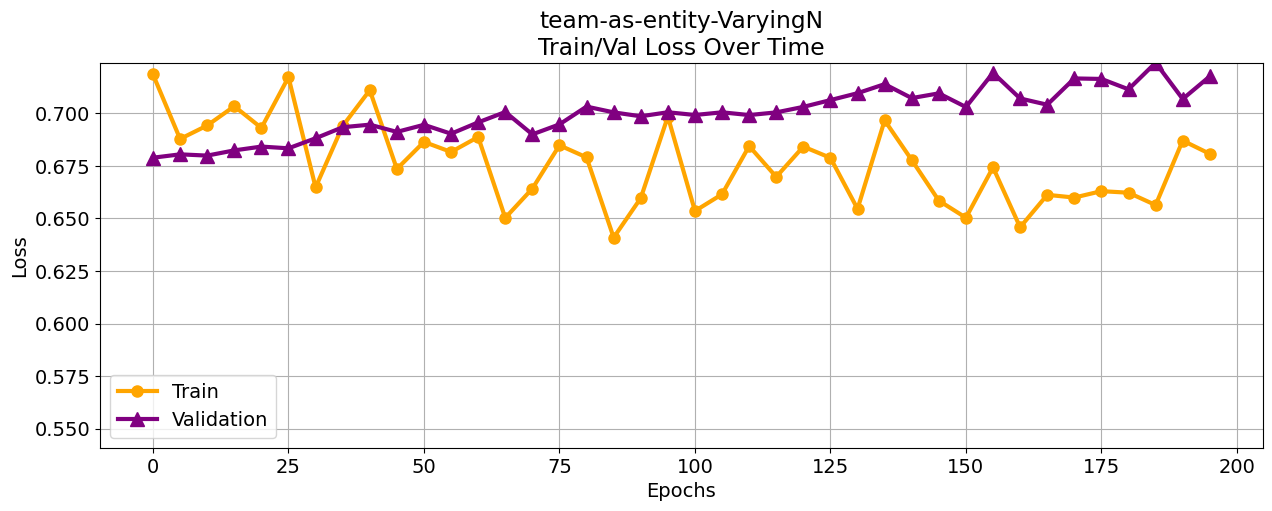

In [10]:
results = []
#epochs = 200
model = TeamStandalone(input_size=input_size, output_size=output_size, hidden_size=hidden_size, num_layers=num_layers, device=device).to(device)
optimizer = opt(model_all.parameters(),lr=0.0001)

res = train_and_validate_varying_N(model_all, criterion, optimizer, dataloaders_train, dataloaders_test, epochs=epochs, loss_interval=loss_interval, device=device)

plot_train_v_loss(f"team-as-entity-VaryingN", res[1], res[2], loss_interval)

In [ ]:
#save model_all to file
torch.save(model.state_dict(), 'models/checkpoints/player_standalone_all_N.pth')

## Linear Baseline Models

### Linear Fixed N

Training model for 1 seasons


0 th epoch :  1.168152088010815
Validation loss for epoch 0: 1.0830309867858887
Validation loss for epoch 5: 0.8996453732252121
10 th epoch :  0.8647737679347186
Validation loss for epoch 10: 0.8838369190692902
Validation loss for epoch 15: 0.8545742601156234
20 th epoch :  0.8448835187394854
Validation loss for epoch 20: 0.8693777561187744
Validation loss for epoch 25: 0.8605652213096618
30 th epoch :  0.836804233806234
Validation loss for epoch 30: 0.8425822794437409
Validation loss for epoch 35: 0.8403346508741378


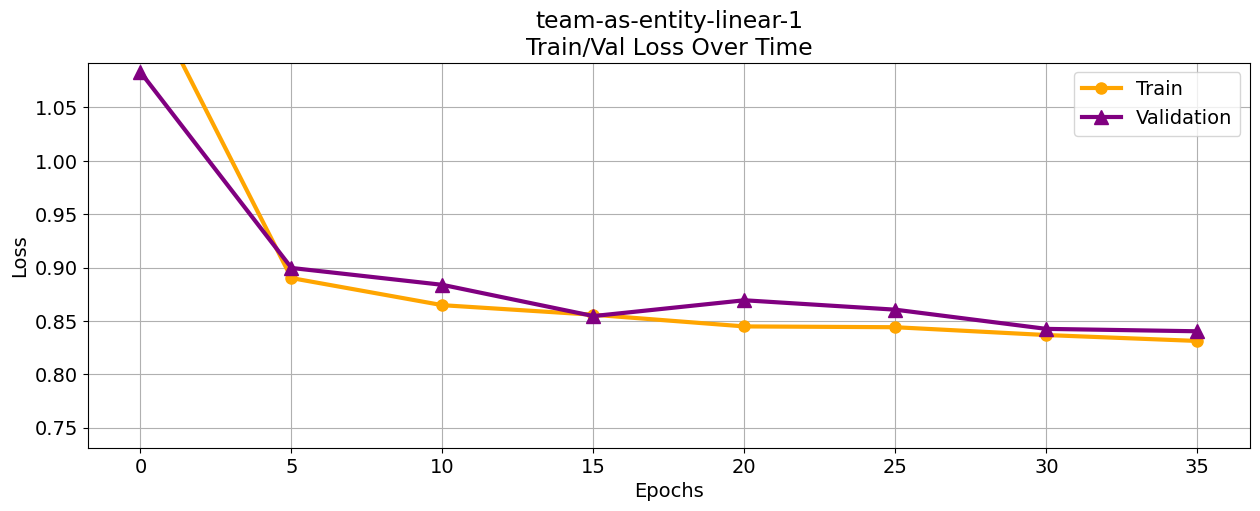

Training model for 2 seasons
0 th epoch :  1.0153889967845036
Validation loss for epoch 0: 0.9239182353019715
Validation loss for epoch 5: 0.8254989922046662
10 th epoch :  0.8585117734395541
Validation loss for epoch 10: 0.8056272521615029
Validation loss for epoch 15: 0.801385161280632
20 th epoch :  0.8363180518150329
Validation loss for epoch 20: 0.7934422612190246
Validation loss for epoch 25: 0.7925643071532249
30 th epoch :  0.8372171663320982
Validation loss for epoch 30: 0.8028357714414597
Validation loss for epoch 35: 0.8004937797784806


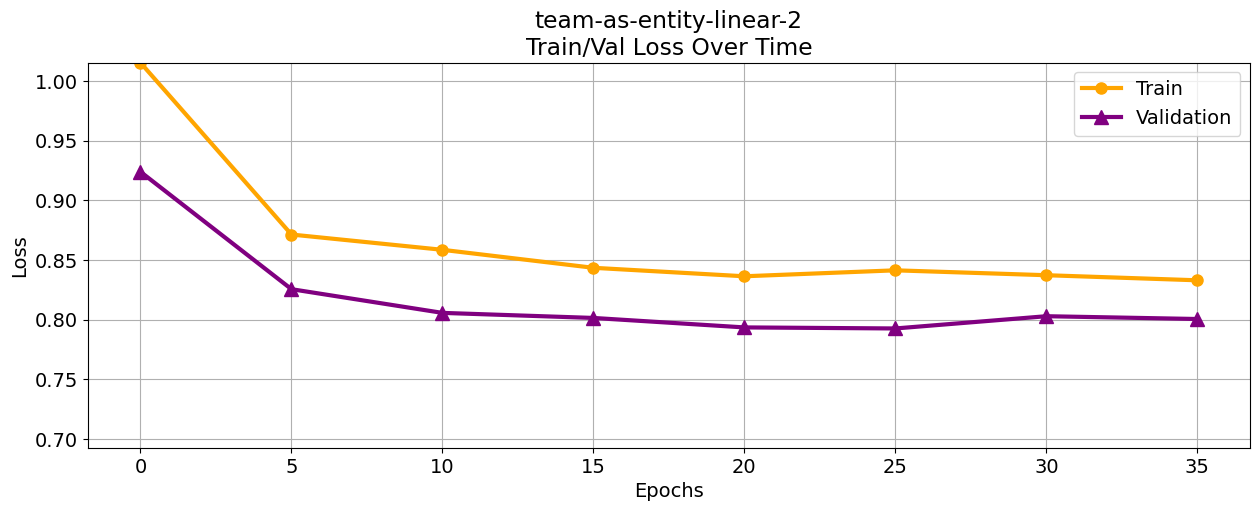

Training model for 3 seasons
0 th epoch :  1.142328432050802
Validation loss for epoch 0: 1.0406764588857953
Validation loss for epoch 5: 0.8867055491397255
10 th epoch :  0.8510402259180101
Validation loss for epoch 10: 0.8750931150034854
Validation loss for epoch 15: 0.8673213281129536
20 th epoch :  0.8229994970863148
Validation loss for epoch 20: 0.8643568126778853
Validation loss for epoch 25: 0.8632517707975287
30 th epoch :  0.8197918185743235
Validation loss for epoch 30: 0.859253023800097
Validation loss for epoch 35: 0.8618394983442206


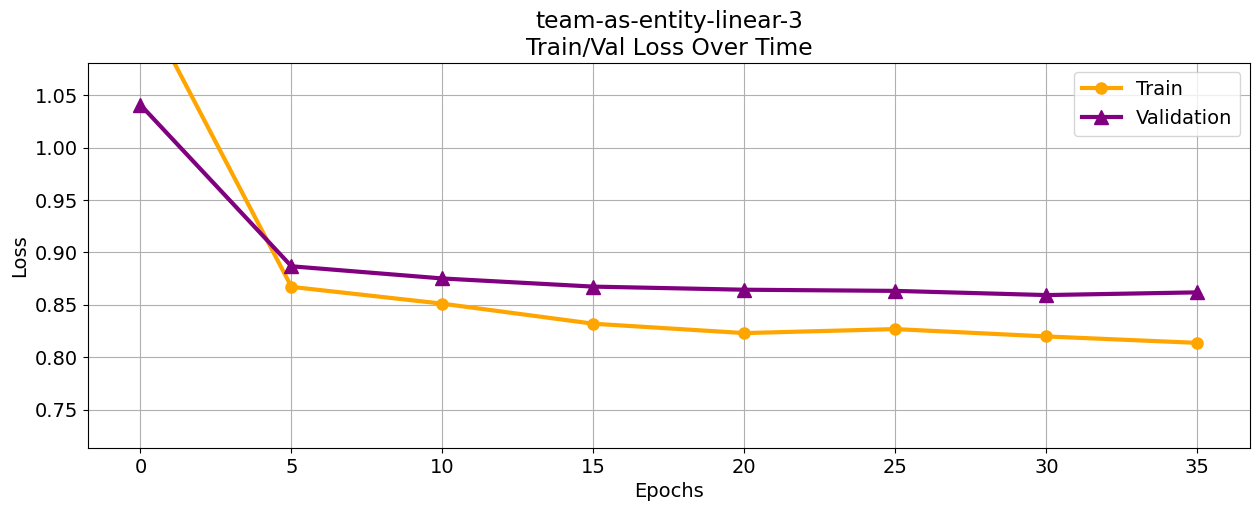

Training model for 4 seasons
0 th epoch :  1.0945488754308448
Validation loss for epoch 0: 1.0157898465792339
Validation loss for epoch 5: 0.8894267976284027
10 th epoch :  0.8480908791973906
Validation loss for epoch 10: 0.8759173221058316
Validation loss for epoch 15: 0.8570349050892724
20 th epoch :  0.8306906065850888
Validation loss for epoch 20: 0.8559996849960751
Validation loss for epoch 25: 0.8736351595984565
30 th epoch :  0.8120580270605268
Validation loss for epoch 30: 0.8664706647396088
Validation loss for epoch 35: 0.8535072737269931


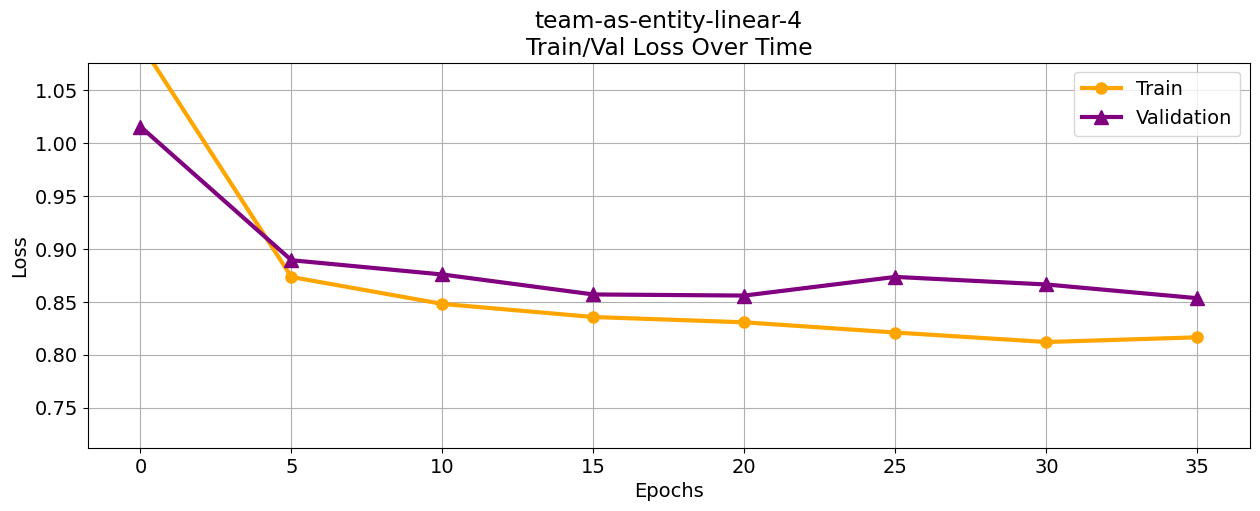

Training model for 5 seasons
0 th epoch :  1.1174672963442627
Validation loss for epoch 0: 1.060014789754694
Validation loss for epoch 5: 0.8621296882629395
10 th epoch :  0.8507652944988675
Validation loss for epoch 10: 0.8445687131448225
Validation loss for epoch 15: 0.7851217578757893
20 th epoch :  0.8301108645068275
Validation loss for epoch 20: 0.8698017326268283
Validation loss for epoch 25: 0.8136971918019381
30 th epoch :  0.8225706418355306
Validation loss for epoch 30: 0.7927833307873119
Validation loss for epoch 35: 0.782212726094506


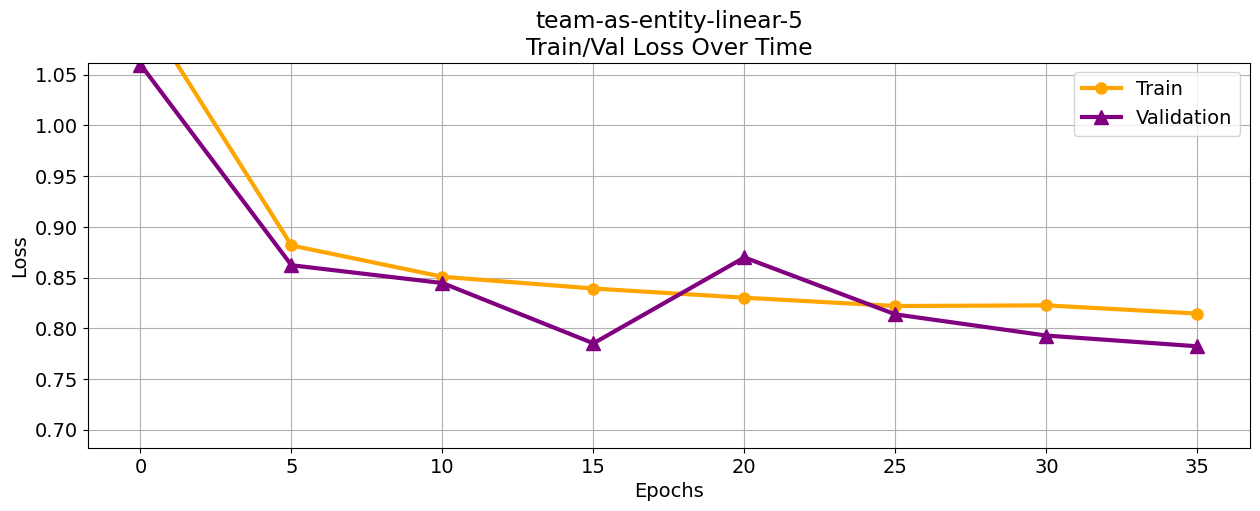

In [11]:
lr = 0.001
epochs = 40
loss_interval = 5

model_linear_N = []
model_linear_N_losses = []


for i in range(len(NL)):
    print(f"Training model for {NL[i]} seasons")
    input_size = len(N_datasets_train[i].__getitem__(0)[0][0])
    model_linear_N.append(TeamLinear(input_size=input_size, output_size=output_size, N=i+1, device=device).to(device))
    optimizer = opt(model_linear_N[i].parameters(), lr=lr)
    
    (model_linear_N[i], train_losses,val_losses) = train_and_validate(model_linear_N[i], criterion, optimizer, N_dataloaders_train[i], N_dataloaders_test[i], epochs=epochs, loss_interval=loss_interval, device=device)
    model_linear_N_losses.append((train_losses, val_losses))

    plot_train_v_loss(f"team-as-entity-linear-{NL[i]}", train_losses, val_losses, loss_interval)

### Linear Varying N (with padding)

Training model for all seasons
0 th epoch :  0.9201483708620072
Validation loss for epoch 0: 0.861746648830526
Validation loss for epoch 5: 0.8294601833119112
10 th epoch :  0.8245694514115651
Validation loss for epoch 10: 0.8248470597407397
Validation loss for epoch 15: 0.8207174511516795
20 th epoch :  0.8195510796705882
Validation loss for epoch 20: 0.8196550691829009
Validation loss for epoch 25: 0.8207483452909133
30 th epoch :  0.8194765365123748
Validation loss for epoch 30: 0.8203625454622157
Validation loss for epoch 35: 0.8164013042169459


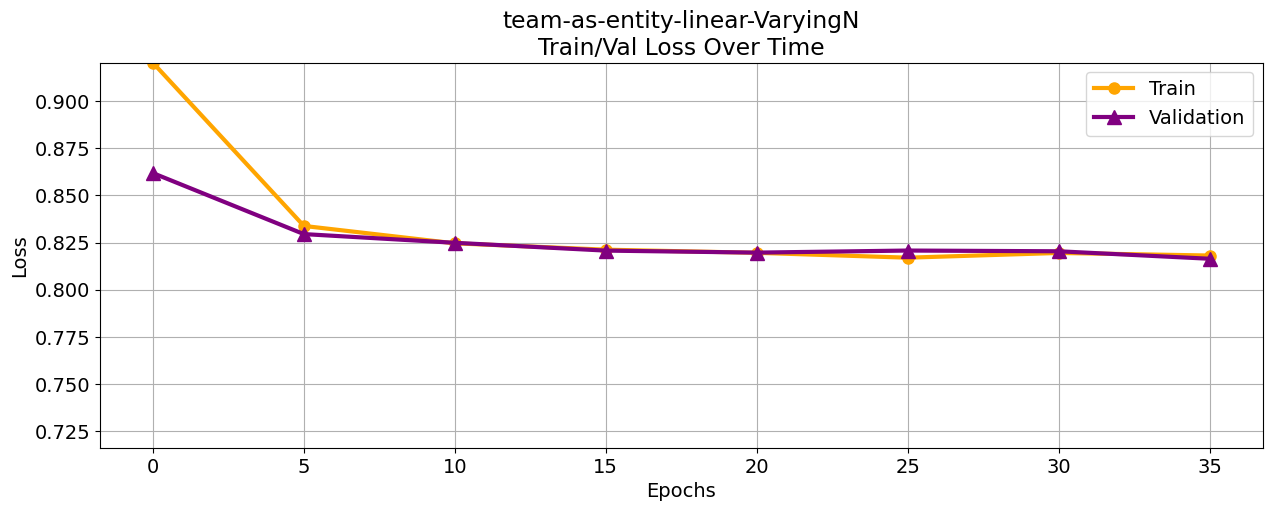

In [12]:
# Train on all data
print("Training model for all seasons")
input_size = len(all_datasets_train.__getitem__(0)[0][0])
model_linear_all = TeamLinear(input_size=input_size, output_size=output_size, N=5, device=device).to(device)
optimizer = opt(model_linear_all.parameters(), lr=lr)
(model_linear_all, train_losses,val_losses) = train_and_validate(model_linear_all, criterion, optimizer, all_dataloader_train, all_dataloader_test, epochs=epochs, loss_interval=loss_interval, device=device)

model_linear_all_losses = (train_losses, val_losses)

plot_train_v_loss(f"team-as-entity-linear-VaryingN", train_losses, val_losses, loss_interval)

# Collect train and val losses

## Average Baseline Model

In [13]:
avg_loss_N = []

print(output_size)

for i in range(5):
    avg_pred = []
    avg_target = []
    for (x, y) in N_datasets_train[i]:
        avg_pred.append(torch.mean(x, dim=0)[[i for i in range(output_size)]]) # select only targets
        avg_target.append(y)
    avg_pred = torch.stack(avg_pred)
    avg_target = torch.stack(avg_target)
    avg_loss_N.append(criterion(avg_pred, avg_target))
    

3


## LSTM Model trained over all N values (with padding)

In [14]:
#evaluate model trained on all N for individual N
model_all_losses_N = []
for i in range(5):
    avg_pred = []
    avg_target = []
    for (x, y) in N_datasets_train[i]:
        pred = model_all(x.unsqueeze(0).to(device))[0]
        avg_pred.append(pred.cpu().detach())
        avg_target.append(y)
    avg_pred = torch.stack(avg_pred)
    avg_target = torch.stack(avg_target)
    train_loss = criterion(avg_pred, avg_target)
    
    avg_pred = []
    avg_target = []
    for (x, y) in N_datasets_test[i]:
        pred = model_all(x.unsqueeze(0).to(device))[0]
        avg_pred.append(pred.cpu().detach())
        avg_target.append(y)
    avg_pred = torch.stack(avg_pred)
    avg_target = torch.stack(avg_target)
    test_loss = criterion(avg_pred, avg_target)
    model_all_losses_N.append((train_loss, test_loss))

## LSTM Model trained over all N values (without padding)

In [18]:
#evaluate model trained on all N for individual N
model_all__losses_N = []
for i in range(5):
    avg_pred = []
    avg_target = []
    for (x, y) in N_datasets_train[i]:
        pred = model(x.unsqueeze(0).to(device))[0]
        avg_pred.append(pred.cpu().detach())
        avg_target.append(y)
    avg_pred = torch.stack(avg_pred)
    avg_target = torch.stack(avg_target)
    train_loss = criterion(avg_pred, avg_target)
    
    avg_pred = []
    avg_target = []
    for (x, y) in N_datasets_test[i]:
        pred = model(x.unsqueeze(0).to(device))[0]
        avg_pred.append(pred.cpu().detach())
        avg_target.append(y)
    avg_pred = torch.stack(avg_pred)
    avg_target = torch.stack(avg_target)
    test_loss = criterion(avg_pred, avg_target)
    model_all__losses_N.append((train_loss, test_loss))

## Linear Model trained over all N values (with padding)

In [19]:
 
model_linear_all_losses_N = []
for i in range(5):
    avg_pred = []
    avg_target = []
    for (x, y) in N_datasets_train[i]:
        #pad
        pads = [torch.zeros_like(x[0]) for _ in range(4-i)]
        #use pre-padding
        if i != 4:
            padded_x = torch.cat((torch.stack(pads), x), dim=0)
        else:
            padded_x = x
        
        pred = model_linear_all(padded_x.unsqueeze(0).to(device))[0]
        avg_pred.append(pred.cpu().detach())
        avg_target.append(y)
    avg_pred = torch.stack(avg_pred)
    avg_target = torch.stack(avg_target)
    train_loss = criterion(avg_pred, avg_target)
    
    avg_pred = []
    avg_target = []
    for (x, y) in N_datasets_test[i]:
        #pad
        pads = [torch.zeros_like(x[0]) for _ in range(4-i)]
        #use pre-padding
        if i != 4:
            padded_x = torch.cat((torch.stack(pads), x), dim=0)
        else:
            padded_x = x
        pred = model_linear_all(padded_x.unsqueeze(0).to(device))[0]
        avg_pred.append(pred.cpu().detach())
        avg_target.append(y)
    avg_pred = torch.stack(avg_pred)
    avg_target = torch.stack(avg_target)
    test_loss = criterion(avg_pred, avg_target)
    model_linear_all_losses_N.append((train_loss, test_loss))

# Plot Results

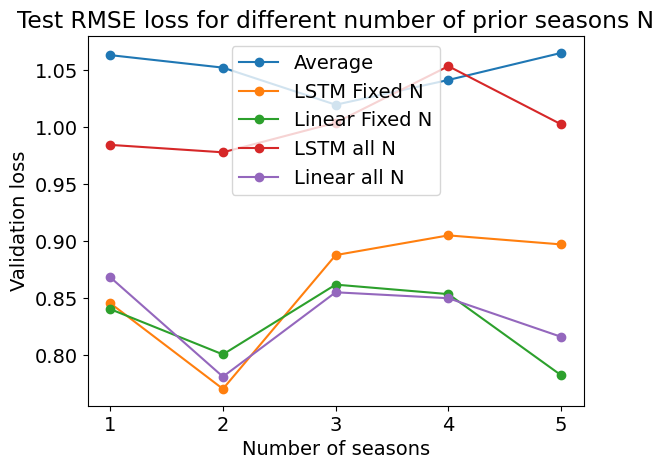

In [20]:
#plot seaons on x-axis and final validation loss on y-axis
plt.title('Test RMSE loss for different number of prior seasons N')
plt.plot(range(1,6), avg_loss_N, label='Average',marker='o')
plt.plot(range(1,6), [model_N_losses[i][1][-1] for i in range(5)], label='LSTM Fixed N',marker='o')
plt.plot(range(1,6), [model_linear_N_losses[i][1][-1] for i in range(5)], label='Linear Fixed N',marker='o')
plt.plot(range(1,6), [model_all__losses_N[i][1] for i in range(5)], label='LSTM all N',marker='o')
plt.plot(range(1,6), [model_linear_all_losses_N[i][1] for i in range(5)], label='Linear all N',marker='o')
plt.xlabel('Number of seasons')
plt.ylabel('Validation loss')
plt.xticks(range(1,6))
plt.legend()

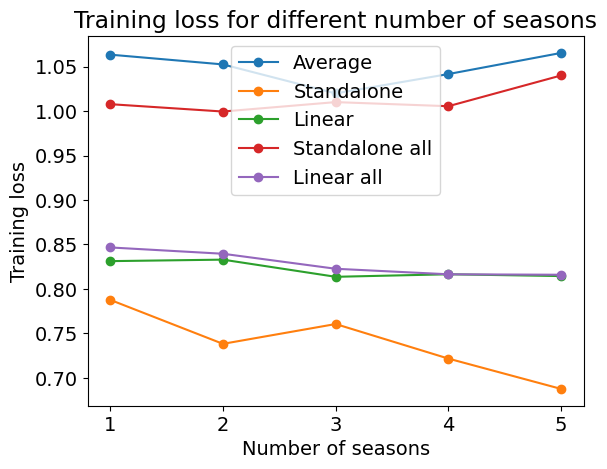

In [24]:
plt.title('Training loss for different number of seasons')
plt.plot(range(1,6), avg_loss_N, label='Average',marker='o')
plt.plot(range(1,6), [model_N_losses[i][0][-1] for i in range(5)], label='Standalone',marker='o')
plt.plot(range(1,6), [model_linear_N_losses[i][0][-1] for i in range(5)], label='Linear',marker='o')
plt.plot(range(1,6), [model_all__losses_N[i][0] for i in range(5)], label='Standalone all',marker='o')
plt.plot(range(1,6), [model_linear_all_losses_N[i][0] for i in range(5)], label='Linear all',marker='o')
plt.xlabel('Number of seasons')
plt.ylabel('Training loss')
plt.xticks(range(1,6))
plt.legend()
